<a href="https://colab.research.google.com/github/Praise-Atadja/Mission_Capstone_Project/blob/main/Final_ECG_DATA_PREPROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **PROJECT NAME:**

##CARDIAC TEK (Improving Cardiovascular Care In Africa Through AI-Driven Diagnosis And Treatment Solutions)


---



(***This project is to digitize, interpret, offer diagnosis and recommendations on ECG report for Myocardiac Infarction ***)







# **CASE STUDY IMPLEMENTATION**

**Abstract**:
Cardiovascular disease (CVD) is the leading cause of death worldwide, with a significant burden in Africa due to limited healthcare access and infrastructure. This research investigates the potential of Artificial Intelligence (AI) to improve CVD care in Africa by enhancing diagnostics, treatment planning, and patient management. It focuses on developing scalable AI solutions tailored to African healthcare systems, assessing their impact, and identifying barriers to adoption, such as infrastructure challenges and data privacy concerns. The study aims to advance global health equity by integrating AI into routine clinical practice.





# **Data Processing Approach for Portfolio Project**

---

   
***Data Sources***:

The ECG images dataset from **Ch. Pervaiz Elahi Institute of Cardiology Multan, Pakistan** is designed to aid researchers in advancing cardiovascular disease research. This dataset is structured with electrocardiogram (ECG) images of various categories of cardiac patients and healthy individuals, providing comprehensive data for scientific analysis.

### Key Information:

- **Total Size**: 194 MB
- **Purpose**: To assist in research focused on cardiovascular diseases, specifically by providing ECG data of patients with different cardiac conditions.

### File Organization:
Each category includes ECG images arranged by 12 leads, providing a standard and comprehensive view of the heart's electrical activity. This dataset is valuable for developing machine learning models to identify, classify, and predict cardiovascular conditions based on ECG patterns.

### Use Case:
The dataset serves as a resource for developing algorithms that can differentiate between normal and abnormal heart activity, detect myocardial infarction, and study the effects of a history of MI on ECG readings. It is intended to benefit the scientific community in exploring cardiovascular health using image-based data.

Link to data source : https://data.mendeley.com/datasets/gwbz3fsgp8/2

### **Short Description of the Data:**

### Dataset Breakdown:
1. **ECG Images of Myocardial Infarction (MI) Patients**:
   - **Quantity**: 240 patients, each with 12-lead ECG images.
   - **Total Images**: 2,880 images.
   - **Condition**: These images capture the heart activity of patients who have suffered a myocardial infarction (heart attack).
   
2. **ECG Images of Patients with Abnormal Heartbeat**:
   - **Quantity**: 233 patients, each with 12-lead ECG images.
   - **Total Images**: 2,796 images.
   - **Condition**: These are ECGs from patients exhibiting arrhythmias or other abnormal heart rhythms.

3. **ECG Images of Patients with a History of Myocardial Infarction (MI)**:
   - **Quantity**: 172 patients, each with 12-lead ECG images.
   - **Total Images**: 2,064 images.
   - **Condition**: These ECGs are from patients with a documented history of MI, but they may not currently be experiencing an active heart attack.

4. **Normal Person ECG Images**:
   - **Quantity**: 284 healthy individuals, each with 12-lead ECG images.
   - **Total Images**: 3,408 images.
   - **Condition**: These ECGs represent normal heart activity with no signs of cardiovascular disease.



In [1]:
#Import Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import resize
import cv2
import os
from scipy import signal
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')
import os
import warnings
warnings.filterwarnings('ignore')


Mounted at /content/drive


# **DATA PREPROCESSING/FEATURE EXTRACTION**

Loading datasets

In [ ]:
#load data

dataset_path = "/content/drive/MyDrive/MISSION CAPSTONE/ECG_DATASET"
files = os.listdir(dataset_path)
print(f"Files in the dataset folder: {files}")


Files in the dataset folder: ['ECG Images of Myocardial Infarction Patients (240x12=2880)', 'ECG Images of Patient that have History of MI (172x12=2064)', 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)', 'Normal Person ECG Images (284x12=3408)']


load images

In [ ]:
import os
from skimage.io import imread
from skimage import img_as_ubyte
import numpy as np

def load_image(image_path):
    """
    Load an image from the specified path and return it.
    If the image is not found or cannot be loaded, returns None.

    Parameters:
    image_path (str): The path to the image file.

    Returns:
    ndarray or None: The image array if loaded successfully, None otherwise.
    """
    try:
        image = imread(image_path)
        # Ensure the image is converted to a usable format (e.g., converting to byte format)
        image = img_as_ubyte(image)
        return image
    except FileNotFoundError:
        print(f"Error: File not found at path: {image_path}")
        return None
    except Exception as e:
        print(f"Error loading image at path {image_path}: {e}")
        return None

def load_images_from_folder(folder_path, valid_extensions=('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')):
    """
    Load all images from the specified folder, filtering by valid extensions.

    Parameters:
    folder_path (str): The path to the folder containing images.
    valid_extensions (tuple): A tuple of valid image file extensions.

    Returns:
    list: A list of loaded images (ndarrays), with None for failed images.
    """
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(valid_extensions)]
    loaded_images = [load_image(os.path.join(folder_path, img)) for img in image_files]
    return loaded_images

# Define paths to each folder containing the images
MI = '/content/drive/MyDrive/MISSION CAPSTONE/ECG_DATASET/ECG Images of Myocardial Infarction Patients (240x12=2880)'
Normal = '/content/drive/MyDrive/MISSION CAPSTONE/ECG_DATASET/Normal Person ECG Images (284x12=3408)'
Abnormal ='/content/drive/MyDrive/MISSION CAPSTONE/ECG_DATASET/ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
H_MI = '/content/drive/MyDrive/MISSION CAPSTONE/ECG_DATASET/ECG Images of Patient that have History of MI (172x12=2064)'


# Load images from each folder
MI_images_loaded = load_images_from_folder(MI)
Normal_images_loaded = load_images_from_folder(Normal)
Abnormal_images_loaded = load_images_from_folder(Abnormal)
H_MI_images_loaded = load_images_from_folder(H_MI)

# Filter out any None values (images that failed to load)
MI_images_loaded = [img for img in MI_images_loaded if img is not None]
Normal_images_loaded = [img for img in Normal_images_loaded if img is not None]
Abnormal_images_loaded = [img for img in Abnormal_images_loaded if img is not None]
H_MI_images_loaded = [img for img in H_MI_images_loaded if img is not None]

# Print the number of successfully loaded images for each category
print(f"Successfully loaded {len(MI_images_loaded)} MI images.")
print(f"Successfully loaded {len(Normal_images_loaded)} Normal images.")
print(f"Successfully loaded {len(Abnormal_images_loaded)} Abnormal images.")
print(f"Successfully loaded {len(H_MI_images_loaded)} H_MI images.")


Successfully loaded 239 MI images.
Successfully loaded 284 Normal images.
Successfully loaded 233 Abnormal images.
Successfully loaded 172 H_MI images.


Dividing ECG image to leads for processing and Looping through the list of ECG lead images to apply preprocessing steps


In [ ]:
import os
import re
import matplotlib.pyplot as plt
from skimage.io import imread

def convert_image_lead(image_file, parent_folder, output_folder):
    """
    This function extracts the 13 ECG leads from the given image and saves them as separate images.

    Parameters:
    - image_file: The name of the image file to process.
    - parent_folder: The directory where the image is located.
    - output_folder: The directory where the lead images will be saved.
    """
    try:
        # Read the image from the given folder
        image_path = os.path.join(parent_folder, image_file)
        image = imread(image_path, plugin='matplotlib')

        # Divide the ECG image into 13 leads based on pixel regions
        Lead_1 = image[300:600, 150:643]
        Lead_2 = image[300:600, 646:1135]
        Lead_3 = image[300:600, 1140:1626]
        Lead_4 = image[300:600, 1630:2125]
        Lead_5 = image[600:900, 150:643]
        Lead_6 = image[600:900, 646:1135]
        Lead_7 = image[600:900, 1140:1626]
        Lead_8 = image[600:900, 1630:2125]
        Lead_9 = image[900:1200, 150:643]
        Lead_10 = image[900:1200, 646:1135]
        Lead_11 = image[900:1200, 1140:1626]
        Lead_12 = image[900:1200, 1630:2125]
        Lead_13 = image[1250:1480, 150:2125]

        # List to store the leads
        leads = [Lead_1, Lead_2, Lead_3, Lead_4, Lead_5, Lead_6, Lead_7, Lead_8, Lead_9, Lead_10, Lead_11, Lead_12, Lead_13]

        # Create a subfolder for the extracted leads inside the output folder
        folder_name = re.sub('.jpg', '', image_file)  # Removing file extension for folder name
        lead_output_dir = os.path.join(output_folder, folder_name)
        os.makedirs(lead_output_dir, exist_ok=True)

        # Loop through the leads and save them as individual images
        for idx, lead in enumerate(leads):
            fig, ax = plt.subplots()
            ax.imshow(lead)
            ax.axis('off')
            ax.set_title(f"Lead {idx + 1}")

            # Save the lead image
            lead_image_path = os.path.join(lead_output_dir, f"Lead_{idx + 1}_Signal.png")
            plt.ioff()
            fig.savefig(lead_image_path, bbox_inches='tight', pad_inches=0)
            plt.close(fig)

        print(f"Successfully processed and saved leads for: {image_file}")

    except Exception as e:
        print(f"Error processing {image_file}: {e}")

# Batch process all images in a folder
def process_all_folders(folders, output_base_folder):
    """
    Process all images in the given folders to extract ECG leads.

    Parameters:
    - folders: A list of folder paths containing ECG images.
    - output_base_folder: The base directory where the processed images will be saved.
    """
    valid_extensions = ('.jpg', '.jpeg', '.png')

    # Create the output folder if it doesn't exist
    os.makedirs(output_base_folder, exist_ok=True)

    for folder in folders:
        if not os.path.exists(folder):
            print(f"Folder does not exist: {folder}")
            continue

        # Process each image in the folder
        image_files = [f for f in os.listdir(folder) if f.lower().endswith(valid_extensions)]
        for image_file in image_files:
            convert_image_lead(image_file, folder, output_base_folder)

# Define paths to each folder containing the images
MI = '/content/drive/MyDrive/MISSION CAPSTONE/ECG_DATASET/ECG Images of Myocardial Infarction Patients (240x12=2880)'
Normal = '/content/drive/MyDrive/MISSION CAPSTONE/ECG_DATASET/Normal Person ECG Images (284x12=3408)'
Abnormal = '/content/drive/MyDrive/MISSION CAPSTONE/ECG_DATASET/ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
H_MI = '/content/drive/MyDrive/MISSION CAPSTONE/ECG_DATASET/ECG Images of Patient that have History of MI (172x12=2064)'

# List of folders to process
folders = [MI, Normal, Abnormal, H_MI]

# Define the base output folder where processed images will be saved
output_base_folder = '/content/drive/MyDrive/MISSION CAPSTONE/Processed_ECG_Images'

# Process all folders
process_all_folders(folders, output_base_folder)


Successfully processed and saved leads for: MI(181).jpg
Successfully processed and saved leads for: MI(198).jpg
Successfully processed and saved leads for: MI(172).jpg
Successfully processed and saved leads for: MI(101).jpg
Successfully processed and saved leads for: MI(208).jpg
Successfully processed and saved leads for: MI(20).jpg
Successfully processed and saved leads for: MI(200).jpg
Successfully processed and saved leads for: MI(73).jpg
Successfully processed and saved leads for: MI(95).jpg
Successfully processed and saved leads for: MI(19).jpg
Successfully processed and saved leads for: MI(55).jpg
Successfully processed and saved leads for: MI(28).jpg
Successfully processed and saved leads for: MI(217).jpg
Successfully processed and saved leads for: MI(127).jpg
Successfully processed and saved leads for: MI(190).jpg
Successfully processed and saved leads for: MI(226).jpg
Successfully processed and saved leads for: MI(109).jpg
Successfully processed and saved leads for: MI(91).jpg

Preprocessing lead images

In [ ]:
import os
import numpy as np
from skimage import measure, color
from skimage.filters import gaussian
from skimage.transform import resize
from skimage.io import imread, imsave
from skimage.filters import threshold_otsu

# Function to extract and save signal leads from ECG images
def extract_signal_leads(Leads, processed_base_folder):
    """
    Extracts and saves signal leads from ECG images.

    Parameters:
        Leads (list): List of ECG lead images.
        processed_base_folder (str): Base directory to save processed images.
    """
    # Looping through the image list containing all leads from 1-13
    for x, y in enumerate(Leads):
        # Convert to grayscale, handling potential alpha channel
        if y.shape[-1] == 4:  # Check if image has an alpha channel
            y = y[:, :, :3]  # If so, select only the RGB channels
        grayscale = color.rgb2gray(y)

        # Smooth the image
        blurred_image = gaussian(grayscale, sigma=0.7)

        # Thresholding using Otsu's method
        global_thresh = threshold_otsu(blurred_image)
        binary_global = blurred_image < global_thresh

        # Resize image for leads 1-11
        if x != 12:
            binary_global = resize(binary_global, (300, 450))

        # Extract the parent folder and image filename from processed_base_folder
        parent_folder, image_filename = os.path.split(processed_base_folder)
        folder_name, _ = os.path.splitext(image_filename)  # Extract folder name

        # Create the output directory if it doesn't exist
        output_dir = os.path.join(parent_folder, folder_name)
        os.makedirs(output_dir, exist_ok=True)

        # Save the preprocessed image
        preprocessed_image_path = os.path.join(output_dir, f'Lead_{x + 1}_preprocessed_Signal.png')
        imsave(preprocessed_image_path, binary_global)  # Using imsave instead of plt.savefig

        # Find contours and get the signal contour
        contours = measure.find_contours(binary_global, 0.8)
        if contours:
            contours_shape = sorted([contour.shape for contour in contours], reverse=True)[0:1]
            for contour in contours:
                if contour.shape in contours_shape:
                    # Resize contour for saving
                    contour_resized = resize(contour, (255, 2))
                    # Save contour data (e.g., to a NumPy file)
                    contour_data_path = os.path.join(output_dir, f'Lead_{x + 1}_Contour_Signal.npy')
                    np.save(contour_data_path, contour_resized)

    lead_no=x
    #convert_csv(test,lead_no,processed_base_folder)
    #scale_csv(test,lead_no,processed_base_folder)
    # scale_csv_1D(test,lead_no,processed_base_folder)


# Define the base directory where processed ECG images are stored
processed_base_folder = '/content/drive/MyDrive/MISSION CAPSTONE/Processed_ECG_Images'

# Loop through all subfolders in the base directory
for subfolder in os.listdir(processed_base_folder):
    subfolder_path = os.path.join(processed_base_folder, subfolder)

    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Create a list of leads by reading the images from the subfolder
        Leads = [imread(os.path.join(subfolder_path, f'Lead_{i}_Signal.png')) for i in range(1, 14)]

        # Call the extraction function for the current subfolder
        extract_signal_leads(Leads, subfolder_path)

        print(f"Processed images in subfolder: {subfolder}")

print("Processing completed for all subfolders.")

Processed images in subfolder: MI(181)
Processed images in subfolder: MI(198)
Processed images in subfolder: MI(172)
Processed images in subfolder: MI(101)
Processed images in subfolder: MI(208)
Processed images in subfolder: MI(20)
Processed images in subfolder: MI(200)
Processed images in subfolder: MI(73)
Processed images in subfolder: MI(95)
Processed images in subfolder: MI(19)
Processed images in subfolder: MI(55)
Processed images in subfolder: MI(28)
Processed images in subfolder: MI(217)
Processed images in subfolder: MI(127)
Processed images in subfolder: MI(190)
Processed images in subfolder: MI(226)
Processed images in subfolder: MI(109)
Processed images in subfolder: MI(91)
Processed images in subfolder: MI(118)
Processed images in subfolder: MI(235)
Processed images in subfolder: MI(64)
Processed images in subfolder: MI(149)
Processed images in subfolder: MI(2)
Processed images in subfolder: MI(145)
Processed images in subfolder: MI(185)
Processed images in subfolder: MI(1

Convert contour to a dataframe

In [ ]:
import os
import pandas as pd
import numpy as np
import shutil  # For moving files

def convert_csv(contour_data, lead_number, processed_base_folder, output_folder):
    """
    Converts contour data to a Pandas DataFrame and saves it as a CSV file
    in a subfolder within the output folder.

    Parameters:
        contour_data (np.ndarray): The contour data.
        lead_number (int): The lead number (1-12 for ECG leads).
        processed_base_folder (str): The original base folder where contour data
                                       was located (used to extract target label and subfolder name).
        output_folder (str): The base output folder where CSV files will be saved.
    """
    # Extract target label from the original base folder name
    target_label = os.path.basename(processed_base_folder)[:2]

    # Create DataFrame
    df = pd.DataFrame(contour_data, columns=['X', 'Y'])
    df['Target'] = target_label

    # Construct CSV file path in the output folder, maintaining subfolder structure
    subfolder_name = os.path.basename(processed_base_folder)  # Get subfolder name
    output_subfolder = os.path.join(output_folder, subfolder_name)
    os.makedirs(output_subfolder, exist_ok=True)  # Create subfolder if it doesn't exist
    csv_file_path = os.path.join(output_subfolder, f"{target_label}_{lead_number + 1}.csv")

    # Save DataFrame to CSV
    df.to_csv(csv_file_path, index=False)

    print(f"Saved contour data for lead {lead_number + 1} to: {csv_file_path}")


# Define the base directory where processed ECG images are stored
processed_base_folder = '/content/drive/MyDrive/MISSION CAPSTONE/Processed_ECG_Images'

# Create the final output folder "processed_scaled_1"
final_output_folder = '/content/drive/MyDrive/MISSION CAPSTONE/processed_scaled_1'
os.makedirs(final_output_folder, exist_ok=True)

# Loop through all subfolders in the base directory
for subfolder in os.listdir(processed_base_folder):
    subfolder_path = os.path.join(processed_base_folder, subfolder)

    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Loop through all lead numbers (1-13)
        for lead_number in range(13):
            # Construct contour data file path
            contour_data_path = os.path.join(subfolder_path, f'Lead_{lead_number + 1}_Contour_Signal.npy')

            # Check if contour data file exists
            if os.path.exists(contour_data_path):
                # Load contour data
                contour_data = np.load(contour_data_path)

                # Call the convert_csv function, passing the output folder
                convert_csv(contour_data, lead_number, subfolder_path, final_output_folder)

        print(f"Processed contours in subfolder: {subfolder}")

print("Processing completed. All CSV files saved to their respective subfolders in 'processed_scaled_1'.")

Streaming output truncated to the last 5000 lines.
Saved contour data for lead 7 to: /content/drive/MyDrive/MISSION CAPSTONE/processed_scaled_1/Normal(202)/No_7.csv
Saved contour data for lead 8 to: /content/drive/MyDrive/MISSION CAPSTONE/processed_scaled_1/Normal(202)/No_8.csv
Saved contour data for lead 9 to: /content/drive/MyDrive/MISSION CAPSTONE/processed_scaled_1/Normal(202)/No_9.csv
Saved contour data for lead 10 to: /content/drive/MyDrive/MISSION CAPSTONE/processed_scaled_1/Normal(202)/No_10.csv
Saved contour data for lead 11 to: /content/drive/MyDrive/MISSION CAPSTONE/processed_scaled_1/Normal(202)/No_11.csv
Saved contour data for lead 12 to: /content/drive/MyDrive/MISSION CAPSTONE/processed_scaled_1/Normal(202)/No_12.csv
Saved contour data for lead 13 to: /content/drive/MyDrive/MISSION CAPSTONE/processed_scaled_1/Normal(202)/No_13.csv
Processed contours in subfolder: Normal(202)
Saved contour data for lead 1 to: /content/drive/MyDrive/MISSION CAPSTONE/processed_scaled_1/Norma

Scaling to 1D

In [ ]:
# prompt: write code to scale the data for the processed_scaled_1 files we generated and save them in processed_scaled_1D add this # Scaling the data with MinMaxScaler
#     scaler = MinMaxScaler()
#     fit_transform_data = scaler.fit_transform(test)
#     # Creating a DataFrame with the first column 'X' (scaled values)
#     Normalized_Scaled = pd.DataFrame(fit_transform_data[:, 0], columns=['X'])
#     # Plotting the scaled data
#     fig6, ax6 = plt.subplots()
#     plt.gca().invert_yaxis()  # Invert y-axis for ECG signal visualization
#     ax6.plot(Normalized_Scaled, linewidth=1, color='black', linestyl

from sklearn.preprocessing import MinMaxScaler
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the base directory where processed ECG images are stored
processed_scaled_1_folder = '/content/drive/MyDrive/MISSION CAPSTONE/processed_scaled_1'
processed_scaled_1D_folder = '/content/drive/MyDrive/MISSION CAPSTONE/processed_scaled_1D'
os.makedirs(processed_scaled_1D_folder, exist_ok=True)


# Loop through all subfolders in the base directory
for subfolder in os.listdir(processed_scaled_1_folder):
    subfolder_path = os.path.join(processed_scaled_1_folder, subfolder)

    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if filename.endswith(".csv"):
                file_path = os.path.join(subfolder_path, filename)
                df = pd.read_csv(file_path)

                # Scaling the data with MinMaxScaler
                test = df[['X', 'Y']]
                scaler = MinMaxScaler()
                fit_transform_data = scaler.fit_transform(test)

                # Creating a DataFrame with the first column 'X' (scaled values)
                Normalized_Scaled = pd.DataFrame(fit_transform_data[:, 0], columns=['X'])

                # Create a new subfolder in processed_scaled_1D with the same name as the existing subfolder
                new_subfolder_path = os.path.join(processed_scaled_1D_folder, subfolder)
                os.makedirs(new_subfolder_path, exist_ok=True)

               # Append '_scaled_1D' to the original filename (before the .csv)
                output_filename = filename.replace('.csv', '_scaled_1D.csv')
                output_file_path = os.path.join(new_subfolder_path, output_filename)

                # Save the scaled data
                Normalized_Scaled.to_csv(output_file_path, index=False)

                # Plotting the scaled data (optional)
                #fig6, ax6 = plt.subplots()
                #plt.gca().invert_yaxis()  # Invert y-axis for ECG signal visualization
                #ax6.plot(Normalized_Scaled, linewidth=1, color='black', linestyle='-')
                #plt.title('Scaled ECG Signal')
                #plt.show()

print("Scaling and saving completed.")

In [ ]:
# prompt: # prompt: organize the generated folders in processed_scaled_1D into  main folders MI, HB, PMI, and Normal by using their first two letters

# Define the source and destination folders
source_folder = '/content/drive/MyDrive/MISSION CAPSTONE/processed_scaled_1D'
destination_folder = '/content/drive/MyDrive/MISSION CAPSTONE/organized_processed_scaled_1D'

# Create the main destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Create the subfolders MI, HB, PMI, and Normal
main_folders = ['MI', 'HB', 'PMI', 'Normal']
for folder in main_folders:
  os.makedirs(os.path.join(destination_folder, folder), exist_ok=True)

# Iterate through the subfolders in the source folder
for subfolder in os.listdir(source_folder):
  subfolder_path = os.path.join(source_folder, subfolder)

  # Check if it's a directory
  if os.path.isdir(subfolder_path):
    # Extract the first two letters from the subfolder name
    first_two_letters = subfolder[:2]

    # Determine the main folder based on the first two letters
    if first_two_letters == 'MI':
      target_folder = 'MI'
    elif first_two_letters == 'HB':
      target_folder = 'HB'
    elif first_two_letters == 'PM':
      target_folder = 'PMI'
    else:
      target_folder = 'Normal'

    # Construct the destination path for the subfolder
    destination_subfolder_path = os.path.join(destination_folder, target_folder, subfolder)

    # Move the subfolder to the appropriate main folder
    shutil.move(subfolder_path, destination_subfolder_path)

print("Folders organized successfully!")

In [ ]:
# prompt: sort the csv fikes in the above code

import os
import shutil

def sort_csv_files(source_folder, destination_folder):
  """
  Sorts CSV files in subfolders based on their label (first two characters of filename).

  Args:
    source_folder: The folder containing subfolders with CSV files.
    destination_folder: The folder where sorted CSV files will be placed.
  """

  # Create the main destination folder if it doesn't exist
  os.makedirs(destination_folder, exist_ok=True)

  # Create the subfolders MI, HB, PMI, and Normal
  main_folders = ['MI', 'HB', 'PMI', 'Normal']
  for folder in main_folders:
    os.makedirs(os.path.join(destination_folder, folder), exist_ok=True)

  # Iterate through the subfolders in the source folder
  for subfolder in os.listdir(source_folder):
    subfolder_path = os.path.join(source_folder, subfolder)

    # Check if it's a directory
    if os.path.isdir(subfolder_path):
      for filename in os.listdir(subfolder_path):
        if filename.endswith(".csv"):
          # Extract the first two letters from the filename
          first_two_letters = filename[:2]

          # Determine the main folder based on the first two letters
          if first_two_letters == 'MI':
            target_folder = 'MI'
          elif first_two_letters == 'HB':
            target_folder = 'HB'
          elif first_two_letters == 'PM':
            target_folder = 'PMI'
          else:
            target_folder = 'Normal'

          # Construct the destination path for the CSV file
          destination_file_path = os.path.join(destination_folder, target_folder, filename)

          # Move the CSV file to the appropriate main folder
          shutil.move(os.path.join(subfolder_path, filename), destination_file_path)

  print("CSV files organized successfully!")



# Example usage:
source_folder = '/content/drive/MyDrive/MISSION CAPSTONE/processed_scaled_1D'
destination_folder = '/content/drive/MyDrive/MISSION CAPSTONE/organized_processed_scaled_1D'
sort_csv_files(source_folder, destination_folder)

In [ ]:

import os
import shutil

def organize_folders(source_folder, destination_folder):
    """
    Organizes subfolders in the source folder into main folders (MI, HB, PMI, Normal)
    based on the first two letters of the subfolder name.

    Args:
        source_folder: The path to the folder containing subfolders to organize.
        destination_folder: The path to the folder where organized subfolders will be moved.
    """
    for subfolder in os.listdir(source_folder):
        subfolder_path = os.path.join(source_folder, subfolder)
        if os.path.isdir(subfolder_path):
            main_folder_name = subfolder[:2]  # Extract the first two letters
            main_folder_path = os.path.join(destination_folder, main_folder_name)
            os.makedirs(main_folder_path, exist_ok=True)
            new_subfolder_path = os.path.join(main_folder_path, subfolder)
            shutil.move(subfolder_path, new_subfolder_path)

# Define source and destination folders
source_folder = '/content/drive/MyDrive/MISSION CAPSTONE/processed_scaled_2D'
destination_folder = '/content/drive/MyDrive/MISSION CAPSTONE/organized_processed_scaled_2D'
os.makedirs(destination_folder, exist_ok=True)

# Organize the folders
organize_folders(source_folder, destination_folder)

print("Folders organized successfully!")

Sort 1D scaled files

In [ ]:
import os
import shutil

def sort_and_save_files_by_number(base_folder, output_folder):
    """
    Sorts CSV files in all subfolders of the given base folder based on the number found after the first underscore,
    and saves them to a new destination folder.

    Parameters:
        base_folder (str): Path to the base folder containing subfolders (MI, HB, PMI, Normal).
        output_folder (str): Path to the output folder where sorted files will be saved.
    """
    os.makedirs(output_folder, exist_ok=True)  # Ensure the output folder exists

    # Loop through all primary folders (MI, HB, PMI, Normal)
    for main_folder in os.listdir(base_folder):
        main_folder_path = os.path.join(base_folder, main_folder)

        if os.path.isdir(main_folder_path):
            # Create corresponding folder in the output folder
            output_main_folder = os.path.join(output_folder, main_folder)
            os.makedirs(output_main_folder, exist_ok=True)

            # Loop through each subfolder (MI(1), MI(2), etc.)
            for subfolder in os.listdir(main_folder_path):
                subfolder_path = os.path.join(main_folder_path, subfolder)

                if os.path.isdir(subfolder_path):
                    # Create corresponding subfolder in the output folder
                    output_subfolder = os.path.join(output_main_folder, subfolder)
                    os.makedirs(output_subfolder, exist_ok=True)

                    # Gather CSV files and sort them by the number after the first underscore
                    csv_files = [f for f in os.listdir(subfolder_path) if f.endswith('.csv')]

                    # Debug: Print the found CSV files
                    print(f"Found files in {subfolder_path}: {csv_files}")

                    # Sort files by the numeric part of the name, using a custom key to extract numbers
                    def sort_key(filename):
                        parts = filename.split('_')
                        if len(parts) > 1:
                            try:
                                return int(parts[1].split('.')[0])
                            except ValueError:
                                return float('inf')  # Put non-numeric values at the end
                        return float('inf')  # Put files without underscores at the end

                    sorted_csv_files = sorted(csv_files, key=sort_key)

                    # Debug: Print the sorted file names
                    print(f"Sorted files for {subfolder}: {sorted_csv_files}")

                    # Copy sorted files to the new location
                    for file in sorted_csv_files:
                        src_file_path = os.path.join(subfolder_path, file)
                        dest_file_path = os.path.join(output_subfolder, file)
                        shutil.copy(src_file_path, dest_file_path)

                    print(f"Copied sorted files from {subfolder_path} to {output_subfolder}")

# --- Main Execution ---
organized_processed_scaled_1D_folder = '/content/drive/MyDrive/MISSION CAPSTONE/organized_processed_scaled_1D'
final_sorted_output_folder = '/content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D'

# Call the function to sort and save files by the number after the first underscore
sort_and_save_files_by_number(organized_processed_scaled_1D_folder, final_sorted_output_folder)

print("Sorting and saving of files based on the numbers completed.")

Plot scaled data

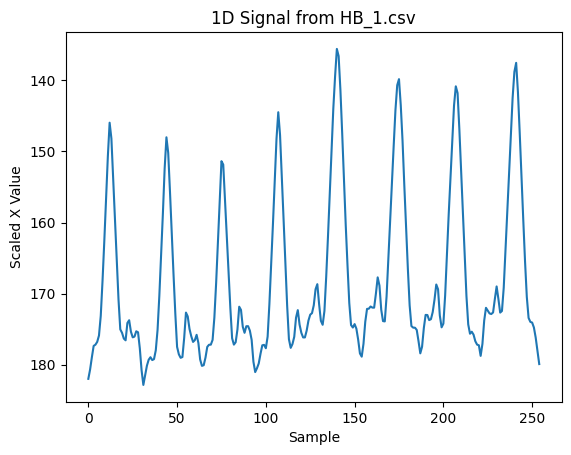

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace with your actual file path
file_path = '/content/drive/MyDrive/MISSION CAPSTONE/processed_scaled_1/HB(1)/HB_1.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Plot the 'X' column
plt.plot(df['X'])
plt.gca().invert_yaxis()  # Invert the y-axis (optional for ECG)
plt.xlabel('Sample')
plt.ylabel('Scaled X Value')
plt.title('1D Signal from HB_1.csv')
plt.show()

Transpose the scaled_1D.csv files

In [ ]:

file_path = '/content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/HB/HB(1)/HB_10_scaled_1D.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Transpose the DataFrame
transposed_df = df.transpose()

# Display the transposed DataFrame
print(transposed_df)

        0         1         2         3         4         5         6    \
X  0.770531  0.798054  0.830223  0.870383  0.900436  0.911956  0.918214   

        7         8         9    ...       245       246       247       248  \
X  0.919487  0.923836  0.903897  ...  0.663672  0.715412  0.773621  0.831003   

       249       250       251       252       253       254  
X  0.87988  0.922943  0.950028  0.948133  0.942827  0.936535  

[1 rows x 255 columns]


Check if files are sorted

In [ ]:
# prompt: print out the files in HB(1) in final_sorted_scaled_2D folder path /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/HB/HB(1)

import os

# Define the folder path you want to list files from
folder_path = '/content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/HB/HB(1)'

# Check if the folder exists
if os.path.exists(folder_path):
    # List all files in the folder
    files_in_folder = os.listdir(folder_path)

    # Print the list of files
    for file_name in files_in_folder:
        print(file_name)
else:
    print(f"The folder '{folder_path}' does not exist.")

HB_1_scaled_1D.csv
HB_2_scaled_1D.csv
HB_3_scaled_1D.csv
HB_4_scaled_1D.csv
HB_5_scaled_1D.csv
HB_6_scaled_1D.csv
HB_7_scaled_1D.csv
HB_8_scaled_1D.csv
HB_9_scaled_1D.csv
HB_10_scaled_1D.csv
HB_11_scaled_1D.csv
HB_12_scaled_1D.csv
HB_13_scaled_1D.csv


Transpose all final_sorted_1D_scaled.csv files

In [2]:
# prompt: transpose all csv files in final_sort_scaled_1D example of a path /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/HB/HB(1)/HB_10_scaled_1D.csv

import os
import pandas as pd

def transpose_csv_files(folder_path):
    """
    Transposes all CSV files within a given folder path.

    Args:
        folder_path: The path to the folder containing CSV files.
    """
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith("_scaled_1D.csv"):
                file_path = os.path.join(root, file)
                try:
                    df = pd.read_csv(file_path)
                    transposed_df = df.transpose()
                    transposed_df.to_csv(file_path, index=False)  # Overwrite original file
                    print(f"Transposed: {file_path}")
                except Exception as e:
                    print(f"Error transposing {file_path}: {e}")

# Example usage
folder_path = '/content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D'
transpose_csv_files(folder_path)

Streaming output truncated to the last 5000 lines.
Transposed: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_6_scaled_1D.csv
Transposed: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_7_scaled_1D.csv
Transposed: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_8_scaled_1D.csv
Transposed: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_9_scaled_1D.csv
Transposed: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_10_scaled_1D.csv
Transposed: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_11_scaled_1D.csv
Transposed: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_12_scaled_1D.csv
Transposed: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_13_scaled_1D.csv
Transposed: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(92)/PM_1_scaled_1D.csv
Transpose

In [6]:
# Assuming you want to add the target column based on the filename
file_path = '/content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/HB/HB(1)/HB_10_scaled_1D.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Extract the target label from the filename
filename = os.path.basename(file_path)
target_label = filename[:2]

# Add the target column to the DataFrame
df['Target'] = target_label

# Display the DataFrame with the new target column
print(df)

          0         1         2         3         4         5         6  \
0  0.770531  0.798054  0.830223  0.870383  0.900436  0.911956  0.918214   

          7         8         9  ...       246       247       248      249  \
0  0.919487  0.923836  0.903897  ...  0.715412  0.773621  0.831003  0.87988   

        250       251       252       253       254  Target  
0  0.922943  0.950028  0.948133  0.942827  0.936535      HB  

[1 rows x 256 columns]


In [7]:

file_path = '/content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/HB/HB(1)/HB_10_scaled_1D.csv'
print(f"Target for {file_path}: HB")

Target for /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/HB/HB(1)/HB_10_scaled_1D.csv: HB


Adding the target

In [8]:
# prompt: now add target columns to all csv files in final_sort_scaled_1D using the first two lead_number like this # Assuming you want to add the target column based on the filename
# file_path = '/content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/HB/HB(1)/HB_10_scaled_1D.csv'
# # Read the CSV file into a pandas DataFrame
# df = pd.read_csv(file_path)
# # Extract the target label from the filename
# filename = os.path.basename(file_path)
# target_label = filename[:2]
# # Add the target column to the DataFrame
# df['Target'] = target_label
# # Display the DataFrame with the new target column
# print(df)  save

def add_target_column_to_csv(folder_path):
  """
  Adds a 'Target' column to all CSV files within a given folder path,
  extracting the target label from the filename (first two characters).

  Args:
      folder_path: The path to the folder containing CSV files.
  """
  for root, _, files in os.walk(folder_path):
      for file in files:
          if file.endswith("_scaled_1D.csv"):
              file_path = os.path.join(root, file)
              try:
                  df = pd.read_csv(file_path)
                  target_label = file[:2]  # Extract the first two characters as target
                  df['Target'] = target_label
                  df.to_csv(file_path, index=False)  # Overwrite original file
                  print(f"Added target column to: {file_path}")
              except Exception as e:
                  print(f"Error processing {file_path}: {e}")

# Example usage
folder_path = '/content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D'
add_target_column_to_csv(folder_path)

Streaming output truncated to the last 5000 lines.
Added target column to: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_6_scaled_1D.csv
Added target column to: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_7_scaled_1D.csv
Added target column to: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_8_scaled_1D.csv
Added target column to: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_9_scaled_1D.csv
Added target column to: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_10_scaled_1D.csv
Added target column to: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_11_scaled_1D.csv
Added target column to: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_12_scaled_1D.csv
Added target column to: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_13_scaled_1D.csv
Added target colu

In [10]:
# prompt: write code to check if there is a column with target in each csv file in final_sort_scaled_1D/ an example path is /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/Normal/Normal(42)/No_13_scaled_1D.csv and print that there is target if found

import os
import pandas as pd

def check_target_column(folder_path):
  """
  Checks if each CSV file in a folder has a 'Target' column.
  """
  for root, _, files in os.walk(folder_path):
    for file in files:
      if file.endswith("_scaled_1D.csv"):
        file_path = os.path.join(root, file)
        try:
          df = pd.read_csv(file_path)
          if 'Target' in df.columns:
            print(f"Target found in: {file_path}")
        except Exception as e:
          print(f"Error processing {file_path}: {e}")


# Example usage
folder_path = '/content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D'
check_target_column(folder_path)

Streaming output truncated to the last 5000 lines.
Target found in: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_6_scaled_1D.csv
Target found in: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_7_scaled_1D.csv
Target found in: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_8_scaled_1D.csv
Target found in: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_9_scaled_1D.csv
Target found in: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_10_scaled_1D.csv
Target found in: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_11_scaled_1D.csv
Target found in: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_12_scaled_1D.csv
Target found in: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scaled_1D/PMI/PMI(53)/PM_13_scaled_1D.csv
Target found in: /content/drive/MyDrive/MISSION CAPSTONE/final_sort_scale